 

    Project title / Motivation
    Data details:
        Summary statistics
        Challenges
        Data augmentation ( if planned)
        EDA / Data preprocessing ( if done)
    ML pipeline setup
        Train test split
        Choice of models and baselines
        Evaluation metrics
    Plan for the rest of the project and task distributions
    Any misc item that you want to docuss

# Project Title: Detecting Image Manipulation 

# Data Details

**Old dataset:**
- https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection
- ~1000 real faces, 1000 fake faces (Photoshopped)

**Potential new datasets:**

If we're open to working with GAN faces (not Photoshopped), then we can try:
- https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces 
This has 70k real faces from the Flickr dataset collected by Nvidia, as well as 70k fake faces sampled from the 1 Million FAKE faces (generated by StyleGAN) - https://www.kaggle.com/datasets/tunguz/1-million-fake-faces 




**summary statistics**
- count of files total
- count of fake faces, count of real faces
- can also do some exploratory analysis on the pixel values of the real vs fake images
- Data augmentation: none currently planned
- EDA / Data preprocessing: standardizing the image sizes, colors, greyscale, removing backgrounds (edge detection), 



# Motivation

If we use GAN generated faces: AI generated faces can be used for the creation of fake online personas for scams, propaganda and online influence campaigns (https://www.npr.org/2022/12/15/1143114122/ai-generated-fake-faces-have-become-a-hallmark-of-online-influence-operations) , and even state espionage (https://apnews.com/article/ap-top-news-artificial-intelligence-social-platforms-think-tanks-politics-bc2f19097a4c4fffaa00de6770b8a60d) 



If we are staying with the Photoshopped faces: This is a relevant problem to address because on social media platforms, such as Instagram, the manipulation of faces can create unrealistic expectations about body image, leading to disorders such as body dysmorphia or eating disorders. Image manipulation can also be used to proliferate misinformation. Thus, websites or public officials may be interested in being able to detect digitally altered images in order to flag them.

If we want to stay with Photoshopped faces:
- There aren't readily available large datasets but we can create our own by using the method outlined in this research paper (https://peterwang512.github.io/FALdetector/) where they used Photoshop scripting to programatically warp images: https://github.com/PeterWang512/FALdetector/issues/3 
- Can use the Flickr dataset to get unmanipulated faces (70k faces: https://www.kaggle.com/datasets/xhlulu/flickrfaceshq-dataset-nvidia-resized-256px) and then manipulate those with the Photoshop warping script above.

**Meeting**:

*   Explore additional model
*   VGG or more (or fine tune the CNN model)
*   compare improvement of accuracy
*   accuracy separately reported (between models, between genders, features that could deceive the model
*   report: result specified (accuracy comparison! baseline, fine-tuned, interesting findings, data visualization. dont only focus on ML)




# ML Pipeline

- split: can use sklearn to create train-test split (I think there was some content in lectures about creating a dev set, train, and test)


Models:
- start with basic NN (https://keras.io/examples/vision/image_classification_from_scratch/ )
- CNN
- Try pretrained image libraries: Resnet-50, FAL warping detection (https://github.com/PeterWang512/FALdetector/issues/3)

evaluation metrics:
- Classification accuracy, confusion matrix
- Also consider the runtime and training time

In [ ]:
# loading datasets into Colab using Kaggle API: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# Read in data from Kaggle

# add in API keys, only need to do once
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# import kaggle
# !kaggle datasets download -d xhlulu/140k-real-and-fake-faces
# !unzip 140k-real-and-fake-faces.zip

In [ ]:
# Read data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# if you get an error, pin the Info 251 Project folder in your Drive first
# (in Google Drive > Shared with Me > right click "Info 251 Project" > Add shortcut to Drive)
%cd /content/gdrive/MyDrive/Info 251 Project/
!ls

/content/gdrive/.shortcut-targets-by-id/1Agh2NXjOWlAXf-V8FKEdMK6L7JJa6t77/Info 251 Project
 A.Ibarra_Analysis.ipynb	       kaggle.json
 Alberto_model			       photoshop_dataset.zip
 Analysis_Work.ipynb		      'Project Write-Up.gdoc'
 data				       sample_code
 faces_data.zip			       test.csv
'Final Project Presentation.gslides'   test.zip
'Jared Analysis.ipynb'		       train.csv
 jared_model			      'valid (1).csv'
'JC Analysis Checkpoint1.ipynb'        valid.csv
'JC Analysis.ipynb'		       valid.zip
 jonathan_model


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [ ]:
# save the zip from GDrive to local VM (unzipped), takes ~1.5 min
!unzip faces_data.zip -d /content/

# set working directory to '/content'
%cd /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: /content/real

In [ ]:
# From the original 140k images, we use the 20k images found in the test folder
data= pd.read_csv('test.csv')
data.head()

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,18233,1,real,test/real/18233.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,54317,1,real,test/real/54317.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,40155,1,real,test/real/40155.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,12875,1,real,test/real/12875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,52543,1,real,test/real/52543.jpg


In [ ]:
data["label_str"]

0        real
1        real
2        real
3        real
4        real
         ... 
19995    fake
19996    fake
19997    fake
19998    fake
19999    fake
Name: label_str, Length: 20000, dtype: object

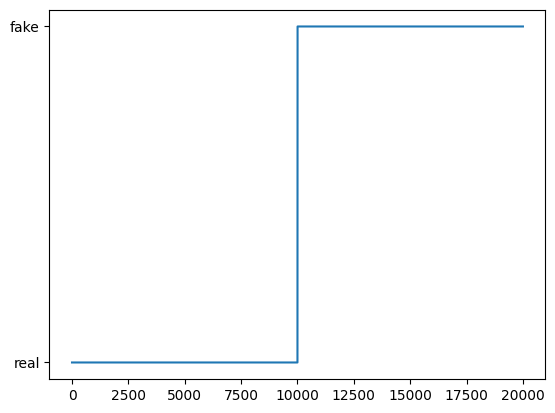

In [ ]:
plt.plot(data["label_str"])
plt.show()

In [ ]:
data.value_counts("label_str")

label_str
fake    10000
real    10000
dtype: int64

In [ ]:
!pwd
%cd /content/real_vs_fake/real-vs-fake/test/

/content
/content/real_vs_fake/real-vs-fake/test


In [ ]:
workdir= os.listdir()
if '.DS_Store' in workdir:
   workdir.remove('.DS_Store')

workdir

['fake', 'real']

In [ ]:
dataset = {"image_path":[],"image_name":[],"image_folder":[]}
for folder in workdir:
    for name in os.listdir(folder):
          dataset["image_path"].append(os.getcwd()+ "/" + folder + "/" + name)
          dataset["image_name"].append(name)
          dataset["image_folder"].append(folder)
dataset = pd.DataFrame(dataset)
dataset

,image_path,image_name,image_folder
0,/content/real_vs_fake/real-vs-fake/test/fake/4...,4YC94909LU.jpg,fake
1,/content/real_vs_fake/real-vs-fake/test/fake/W...,WSI88DN7MA.jpg,fake
2,/content/real_vs_fake/real-vs-fake/test/fake/V...,V3VVR7MDGG.jpg,fake
3,/content/real_vs_fake/real-vs-fake/test/fake/L...,LGALSTE0HE.jpg,fake
4,/content/real_vs_fake/real-vs-fake/test/fake/W...,W5Q7BW95TZ.jpg,fake
...,...,...,...
19995,/content/real_vs_fake/real-vs-fake/test/real/6...,60579.jpg,real
19996,/content/real_vs_fake/real-vs-fake/test/real/0...,08350.jpg,real
19997,/content/real_vs_fake/real-vs-fake/test/real/3...,34173.jpg,real
19998,/content/real_vs_fake/real-vs-fake/test/real/2...,29512.jpg,real


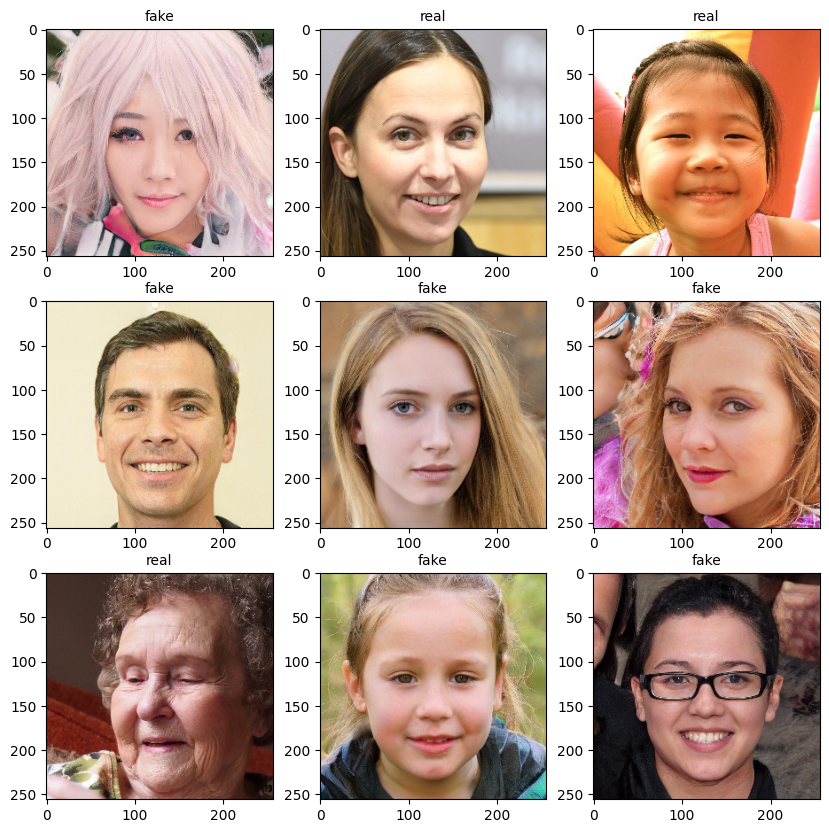

In [ ]:
plt.figure(figsize = (10,10))
for i in range(9):
    random = np.random.randint(1,len(dataset))
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random, "image_folder"], size = 10) 
    
plt.show()

In [ ]:
plt.imread(dataset.loc[random,"image_path"]).shape

(256, 256, 3)

In [ ]:
path = !pwd
path[0]

'/content/real_vs_fake/real-vs-fake/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.models import load_model
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [ ]:
!pwd

/content/real_vs_fake/real-vs-fake/test


In [ ]:
# https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator 

path = !pwd
path = path[0]

image_gen = ImageDataGenerator(
    validation_split=0.1
)

train_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    subset='training'
)

validation_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    #classes=['fake','real'],
    subset='validation')


Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
len(train_generator)

720

## Model 0

In [ ]:
# define model
model0 = Sequential()
model0.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu',
                 input_shape=(128,128,1))) 

model0.add(MaxPooling2D(pool_size=(2, 2)))

model0.add(Flatten())
model0.add(Dense(8, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.000001)
model0.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
model0f = model0.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10


<ipython-input-118-959b98a53f0e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model0f = model0.fit_generator(


720/720 [==============================] - 51s 71ms/step - loss: 1.2185 - accuracy: 0.5531 - val_loss: 0.6871 - val_accuracy: 0.5765
Epoch 2/10
720/720 [==============================] - 42s 58ms/step - loss: 0.6569 - accuracy: 0.6117 - val_loss: 0.6378 - val_accuracy: 0.6420
Epoch 3/10
720/720 [==============================] - 42s 59ms/step - loss: 0.6202 - accuracy: 0.6603 - val_loss: 0.6205 - val_accuracy: 0.6670
Epoch 4/10
720/720 [==============================] - 40s 56ms/step - loss: 0.6011 - accuracy: 0.6771 - val_loss: 0.5985 - val_accuracy: 0.6815
Epoch 5/10
720/720 [==============================] - 41s 57ms/step - loss: 0.5844 - accuracy: 0.6939 - val_loss: 0.5852 - val_accuracy: 0.7000
Epoch 6/10
720/720 [==============================] - 41s 57ms/step - loss: 0.5692 - accuracy: 0.7053 - val_loss: 0.5791 - val_accuracy: 0.6995
Epoch 7/10
720/720 [==============================] - 41s 57ms/step - loss: 0.5617 - accuracy: 0.7097 - val_loss: 0.5822 - val_accuracy: 0.6870
Epo

In [ ]:
%cd /content/gdrive/MyDrive/Info 251 Project/jared_model/
model0.save('jared_cnnmodel0.h5')
model0_pd = pd.DataFrame(model0f.history)
model0_pd.to_csv("/content/gdrive/MyDrive/Info 251 Project/jared_model/model0_pd.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/.shortcut-targets-by-id/1Agh2NXjOWlAXf-V8FKEdMK6L7JJa6t77/Info 251 Project/jared_model
/content/real_vs_fake/real-vs-fake/test


## Model 1

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides = 1, activation='relu',
                 input_shape=(128,128,1))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides = 1, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
modelf = model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
  1/720 [..............................] - ETA: 49s - loss: 0.5489 - accuracy: 0.7200

<ipython-input-115-b2fd0bb63e13>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelf = model.fit_generator(


720/720 [==============================] - 45s 63ms/step - loss: 0.5423 - accuracy: 0.7284 - val_loss: 0.5449 - val_accuracy: 0.7225
Epoch 2/10
720/720 [==============================] - 41s 57ms/step - loss: 0.4657 - accuracy: 0.7793 - val_loss: 0.4683 - val_accuracy: 0.7725
Epoch 3/10
720/720 [==============================] - 42s 59ms/step - loss: 0.3927 - accuracy: 0.8212 - val_loss: 0.4571 - val_accuracy: 0.7920
Epoch 4/10
720/720 [==============================] - 41s 57ms/step - loss: 0.3349 - accuracy: 0.8537 - val_loss: 0.4432 - val_accuracy: 0.8100
Epoch 5/10
720/720 [==============================] - 41s 58ms/step - loss: 0.2777 - accuracy: 0.8817 - val_loss: 0.5089 - val_accuracy: 0.7990
Epoch 6/10
720/720 [==============================] - 41s 58ms/step - loss: 0.2373 - accuracy: 0.8995 - val_loss: 0.5729 - val_accuracy: 0.8030
Epoch 7/10
720/720 [==============================] - 42s 58ms/step - loss: 0.1887 - accuracy: 0.9234 - val_loss: 0.5311 - val_accuracy: 0.8125
Epo

In [ ]:
%cd /content/gdrive/MyDrive/Info 251 Project/jared_model/
model.save('jared_cnnmodel1.h5')
model1_pd = pd.DataFrame(modelf.history)
model1_pd.to_csv("/content/gdrive/MyDrive/Info 251 Project/jared_model/model1_pd.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/.shortcut-targets-by-id/1Agh2NXjOWlAXf-V8FKEdMK6L7JJa6t77/Info 251 Project/jared_model
/content/real_vs_fake/real-vs-fake/test


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)      

## Model 2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), strides = 1, activation='relu',
                 input_shape=(128,128,1))) 
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
model2f = model2.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10


<ipython-input-110-174643697b8e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2f = model2.fit_generator(


720/720 [==============================] - 46s 63ms/step - loss: 0.9743 - accuracy: 0.6386 - val_loss: 0.5761 - val_accuracy: 0.6990
Epoch 2/10
720/720 [==============================] - 45s 62ms/step - loss: 0.5466 - accuracy: 0.7257 - val_loss: 0.5323 - val_accuracy: 0.7420
Epoch 3/10
720/720 [==============================] - 43s 60ms/step - loss: 0.4838 - accuracy: 0.7669 - val_loss: 0.4843 - val_accuracy: 0.7645
Epoch 4/10
720/720 [==============================] - 43s 60ms/step - loss: 0.4348 - accuracy: 0.7988 - val_loss: 0.5133 - val_accuracy: 0.7575
Epoch 5/10
720/720 [==============================] - 42s 58ms/step - loss: 0.3684 - accuracy: 0.8354 - val_loss: 0.4487 - val_accuracy: 0.7890
Epoch 6/10
720/720 [==============================] - 42s 58ms/step - loss: 0.3173 - accuracy: 0.8610 - val_loss: 0.4513 - val_accuracy: 0.7980
Epoch 7/10
720/720 [==============================] - 41s 58ms/step - loss: 0.2612 - accuracy: 0.8902 - val_loss: 0.4746 - val_accuracy: 0.7990
Epo

In [ ]:
%cd /content/gdrive/MyDrive/Info 251 Project/jared_model/
model2.save('jared_cnnmodel2.h5')
model2_pd = pd.DataFrame(model2f.history)
model2_pd.to_csv("/content/gdrive/MyDrive/Info 251 Project/jared_model/model2_pd.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/.shortcut-targets-by-id/1Agh2NXjOWlAXf-V8FKEdMK6L7JJa6t77/Info 251 Project/jared_model
/content/real_vs_fake/real-vs-fake/test


## Model 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3,3), strides = 1, activation='relu',
                 input_shape=(128,128,1))) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu')) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu')) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
model3f=model3.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/30
720/720 [==============================] - 44s 59ms/step - loss: 0.6712 - accuracy: 0.6714 - val_loss: 0.5678 - val_accuracy: 0.6910
Epoch 2/30
720/720 [==============================] - 72s 100ms/step - loss: 0.4996 - accuracy: 0.7563 - val_loss: 0.5751 - val_accuracy: 0.6930
Epoch 3/30
720/720 [==============================] - 41s 57ms/step - loss: 0.4241 - accuracy: 0.8066 - val_loss: 0.4546 - val_accuracy: 0.7815
Epoch 4/30
720/720 [==============================] - 42s 59ms/step - loss: 0.3523 - accuracy: 0.8456 - val_loss: 0.5104 - val_accuracy: 0.7490
Epoch 5/30
720/720 [==============================] - 43s 60ms/step - loss: 0.2894 - accuracy: 0.8784 - val_loss: 0.4641 - val_accuracy: 0.7845
Epoch 6/30
720/720 [==============================] - 41s 57ms/step - loss: 0.2327 - accuracy: 0.9035 - val_loss: 0.4365 - val_accuracy: 0.8095
Epoch 7/30
720/720 [==============================] - 41s 57ms/step - loss: 0.1750 - accuracy: 0.9324 - val_loss: 0.4058 - val_accuracy

In [ ]:
%cd /content/
model3.save('jared_cnnmodel3.h5')
%cd /content/real_vs_fake/real-vs-fake/test

/content
/content/real_vs_fake/real-vs-fake/test


In [ ]:
model3_pd = pd.DataFrame(model3f.history)
model3_pd.to_csv("/content/gdrive/MyDrive/Info 251 Project/jared_model/model3_pd.csv")

## Model 5

In [ ]:
model5 = Sequential()
model5.add(Conv2D(filters=32, kernel_size=(3,3), strides = 1, activation='relu',
                 input_shape=(128,128,1))) 
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu')) 
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
model5f=model5.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 521s 724ms/step - loss: 0.5715 - accuracy: 0.7061 - val_loss: 0.5234 - val_accuracy: 0.7385
Epoch 2/10
720/720 [==============================] - 521s 723ms/step - loss: 0.4435 - accuracy: 0.7938 - val_loss: 0.5554 - val_accuracy: 0.7485
Epoch 3/10
720/720 [==============================] - 528s 733ms/step - loss: 0.3471 - accuracy: 0.8459 - val_loss: 0.5015 - val_accuracy: 0.7805
Epoch 4/10
720/720 [==============================] - 522s 725ms/step - loss: 0.2681 - accuracy: 0.8873 - val_loss: 0.6467 - val_accuracy: 0.7745
Epoch 5/10
720/720 [==============================] - 519s 721ms/step - loss: 0.2210 - accuracy: 0.9085 - val_loss: 0.7142 - val_accuracy: 0.7580
Epoch 6/10
720/720 [==============================] - 518s 719ms/step - loss: 0.1709 - accuracy: 0.9283 - val_loss: 0.7197 - val_accuracy: 0.7735
Epoch 7/10
720/720 [==============================] - 517s 718ms/step - loss: 0.1419 - accuracy: 0.9432 - val_loss: 0.9070 -

In [ ]:
%cd /content/gdrive/MyDrive/Info 251 Project/jared_model/
model5.save('jared_cnnmodel5.h5')
model5_pd = pd.DataFrame(model5f.history)
model5_pd.to_csv("/content/gdrive/MyDrive/Info 251 Project/jared_model/model5_pd.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/.shortcut-targets-by-id/1Agh2NXjOWlAXf-V8FKEdMK6L7JJa6t77/Info 251 Project/jared_model
/content/real_vs_fake/real-vs-fake/test


## Test Prediction

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
path = '/content/real_vs_fake/real-vs-fake/valid'

image_gen_test = ImageDataGenerator(
    validation_split=0.1
)

throwaway_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle=False,
    subset='training'
)

test_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=1,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle= False,
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model0 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel0.h5')

In [ ]:
y_pred = model0.predict(test_generator)

2000/2000 [==============================] - 22s 11ms/step


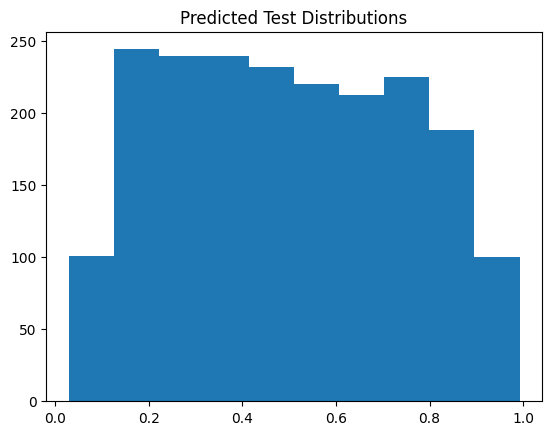

In [ ]:
plt.hist(y_pred)
plt.title('Predicted Test Distributions')
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred > 0.5))
print(classification_report(y_test, y_pred > 0.5))

[[739 261]
 [286 714]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.73      0.71      0.72      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [ ]:
train_generator.class_indices

{'fake': 0, 'real': 1}

In [ ]:
model1 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel1.h5')
y_pred1 = model1.predict(test_generator)
print(confusion_matrix(y_test, y_pred1 > 0.5))
print(classification_report(y_test, y_pred1 > 0.5))

2000/2000 [==============================] - 25s 12ms/step
[[838 162]
 [175 825]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.84      0.82      0.83      1000

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [ ]:
model2 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel2.h5')
y_pred2 = model2.predict(test_generator)
print(confusion_matrix(y_test, y_pred2 > 0.5))
print(classification_report(y_test, y_pred2 > 0.5))

2000/2000 [==============================] - 29s 14ms/step
[[905  95]
 [314 686]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1000
           1       0.88      0.69      0.77      1000

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.79      2000
weighted avg       0.81      0.80      0.79      2000



In [ ]:
model3 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel3.h5')
y_pred3 = model3.predict(test_generator)
print(confusion_matrix(y_test, y_pred3 > 0.5))
print(classification_report(y_test, y_pred3 > 0.5))

2000/2000 [==============================] - 30s 15ms/step
[[883 117]
 [145 855]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.88      0.85      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
model5 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel5.h5')
y_pred5 = model5.predict(test_generator)
print(confusion_matrix(y_test, y_pred5 > 0.5))
print(classification_report(y_test, y_pred5 > 0.5))

2000/2000 [==============================] - 28s 14ms/step
[[731 269]
 [151 849]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1000
           1       0.76      0.85      0.80      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [ ]:
model6 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel6.h5')
y_pred6 = model6.predict(test_generator)
print(confusion_matrix(y_test, y_pred6 > 0.5))
print(classification_report(y_test, y_pred6 > 0.5))

2000/2000 [==============================] - 57s 28ms/step
[[901  99]
 [263 737]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.88      0.74      0.80      1000

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



In [ ]:
model8 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel8.h5')
y_pred8 = model8.predict(test_generator)
print(confusion_matrix(y_test, y_pred8 > 0.5))
print(classification_report(y_test, y_pred8 > 0.5))

2000/2000 [==============================] - 32s 16ms/step
[[796 204]
 [167 833]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.80      0.83      0.82      1000

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [ ]:
model0 = load_model('/content/gdrive/MyDrive/Info 251 Project/jared_model/jared_cnnmodel0.h5')
y_pred0 = model0.predict(test_generator)
print(confusion_matrix(y_test, y_pred0 > 0.5))
print(classification_report(y_test, y_pred0 > 0.5))

2000/2000 [==============================] - 32s 16ms/step
[[739 261]
 [286 714]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.73      0.71      0.72      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [ ]:
print("ROC-AUC Score cnn1:", roc_auc_score(y_test, y_pred0))
print("ROC-AUC Score cnn2:", roc_auc_score(y_test, y_pred5))
print("ROC-AUC Score cnn3:", roc_auc_score(y_test, y_pred1))
print("ROC-AUC Score cnn4:", roc_auc_score(y_test, y_pred2))
print("ROC-AUC Score cnn5:", roc_auc_score(y_test, y_pred6))
print("ROC-AUC Score cnn6:", roc_auc_score(y_test, y_pred8))

ROC-AUC Score cnn1: 0.805795
ROC-AUC Score cnn2: 0.8543475
ROC-AUC Score cnn3: 0.903734
ROC-AUC Score cnn4: 0.8963430000000001
ROC-AUC Score cnn5: 0.908878
ROC-AUC Score cnn6: 0.8919550000000002
